<a href="https://colab.research.google.com/github/Flequi96/ChatConSockets/blob/master/RedNeuronalBasica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

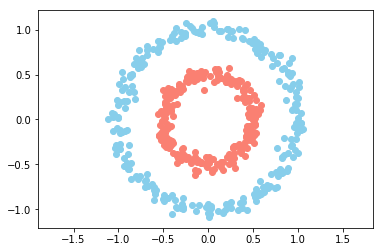

In [60]:
n = 500
p = 2

X, Y = make_circles(n_samples=n, factor= 0.5, noise= 0.05)

Y = Y[: , np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [0]:
# CLASE DE LA CAPA DE LA RED

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)* 2 -1
    self.W = np.random.rand(n_conn, n_neur)* 2 -1

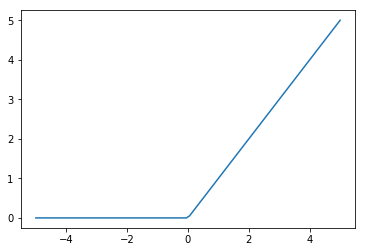

In [62]:
# FUNCIONES DE ACTIVACIÓN

sigm = (lambda x: 1 / (1 +np.e ** (-x)),
        lambda x: x*(1 -x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
pit.plot(_x, relu(_x))

In [0]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(p, 8, sigm)
# ...

def create_nn(topology, act_f):
  
  nn = []
  
  for l, layer in enumerate(topology[:-1]):
    
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
  return nn



In [0]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))


def train(neural_net, X, Y, l2_cost, lr=0.5, train = True):
  
  out = [(None, X)]
  
  # forwar pass
  for l, layer in enumerate(neural_net):
  
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    
    out.append((z, a))
    
  
  if train:
    
    # Backward pass
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      
    
          
      if l == len(neural_net) - 1:
        # Calcular delta última capa.
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      
      else:
        # Calcular delta respecto a capa previa.
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
    
      _W = neural_net[l].W
      
    
      # Gradiant descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis =0, keepdims = True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
      
      
  return out[-1][1]
    
    
  
  
  
  
  
train(neural_net, X, Y, l2_cost, 0.5)  

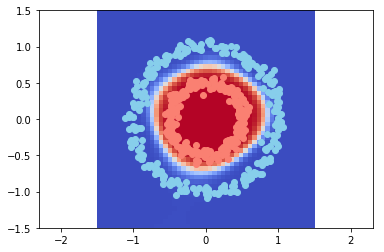

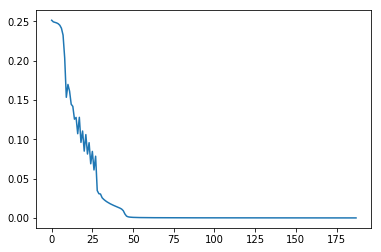

[[9.97601802e-04]
 [1.45349965e-02]
 [9.99366358e-01]
 [3.07577647e-03]
 [3.16401566e-03]
 [9.98655741e-01]
 [6.46908655e-03]
 [9.99421351e-01]
 [9.23451245e-04]
 [3.29940409e-03]
 [9.99656391e-01]
 [6.70822436e-03]
 [6.16158185e-03]
 [1.63114309e-03]
 [1.45038877e-03]
 [9.96938778e-01]
 [9.37572217e-01]
 [9.99390921e-01]
 [9.98509115e-01]
 [9.97719507e-01]
 [9.24485536e-04]
 [9.98024504e-01]
 [6.10636207e-05]
 [9.83753116e-01]
 [2.00424081e-03]
 [1.50428637e-02]
 [6.59891500e-03]
 [9.97533813e-01]
 [9.98519493e-01]
 [9.99612143e-01]
 [3.13559232e-03]
 [9.98397851e-01]
 [9.97431910e-01]
 [8.42538535e-03]
 [1.35851894e-02]
 [9.99575775e-01]
 [9.99470498e-01]
 [9.98733773e-01]
 [1.82192121e-03]
 [6.47043001e-04]
 [1.41276879e-03]
 [9.97774000e-01]
 [5.10579269e-03]
 [9.98856449e-01]
 [9.95630202e-01]
 [8.91535123e-04]
 [1.30209484e-02]
 [1.20879218e-02]
 [9.97697230e-01]
 [4.66817679e-03]
 [9.89422023e-01]
 [9.96830501e-01]
 [9.97095502e-01]
 [9.96682000e-01]
 [2.87858957e-02]
 [9.888652

In [0]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(5000):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.2)  